In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [15]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")


In [16]:
df_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [18]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)


In [19]:
df_fake["class"] = 0
df_true["class"] = 1
df_fake.shape,df_true.shape

((23471, 5), (21407, 5))

In [20]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1


<ipython-input-20-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-20-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [21]:
df_fake_manual_testing.head(10)


,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [22]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [23]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")


In [24]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [25]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [27]:
df = df_merge.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()

,0
text,0
class,0


In [28]:
df = df.sample(frac = 1)
df.head()

,text,class
10987,WASHINGTON (Reuters) - U.S. lawmakers criticiz...,1
18037,MANILA (Reuters) - Trust and satisfaction in P...,1
19081,"Cosmetics brand Lush, popular among young girl...",0
13523,Why is the NFL ignoring this situation? Are th...,0
21145,"(Reuters) - Negotiators from Canada, Mexico an...",1


In [30]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.columns
df.head()


,text,class
0,WASHINGTON (Reuters) - U.S. lawmakers criticiz...,1
1,MANILA (Reuters) - Trust and satisfaction in P...,1
2,"Cosmetics brand Lush, popular among young girl...",0
3,Why is the NFL ignoring this situation? Are th...,0
4,"(Reuters) - Negotiators from Canada, Mexico an...",1


In [31]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(wordopt)


In [32]:
x = df["text"]
y = df["class"]



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [34]:

df.loc[x_test.index]

,text,class
24641,project veritas just released yet another vide...,0
7701,the clinton carpetbaggers have moved around do...,0
19082,washington reuters myanmar should respond ...,1
28390,washington reuters president donald trump ...,1
6537,in a stunning example of just how morally bank...,0
...,...,...
15186,the taliban or isis does it really matter ra...,0
26430,paris reuters president emmanuel macron sa...,1
2584,,0
12568,fox news harris faulkner blows up the whole r...,0


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5880
           1       0.98      0.99      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9860071301247771

In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5880
           1       0.99      1.00      1.00      5340

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Reduce n_estimators and use a smaller learning rate
GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5880
           1       0.99      1.00      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5880
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [41]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GBC.predict(new_xv_test)
    pred_RF = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GB[0]),
                                                                                                              output_lable(pred_RF[0])))



In [42]:
news = str(input())
manual_testing(news)

trump retired


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [43]:
news = str(input())
manual_testing(news)

trump won election


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [44]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# For Logistic Regression:
cm_lr = confusion_matrix(y_test, pred_lr)

# For Decision Tree:
cm_dt = confusion_matrix(y_test, pred_dt)

# For Gradient Boosting:
cm_gbc = confusion_matrix(y_test, pred_gbc)

# For Random Forest:
cm_rfc = confusion_matrix(y_test, pred_rfc)


In [46]:
# Create an empty DataFrame called predicted_output
predicted_output = pd.DataFrame()

# Now you can assign values to its columns
predicted_output['Original_Text'] = x_test.values
predicted_output['True_Label'] = y_test.values
predicted_output['Original_Text'] = x_test.values
predicted_output['True_Label'] = y_test.values
predicted_output.to_csv('predicted_output.csv', index=False)
# Assuming you want to use the Random Forest model (RFC)
pred_rfc = LR.predict(xv_test) # Remove the extra space or tab at the beginning of this line
results = pd.DataFrame({'Predicted_Class': pred_rfc, 'True_Class': y_test})
results['Original_Text'] = x_test.values
results.to_csv('prediction_results.csv', index=False)

In [47]:
from google.colab import files
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

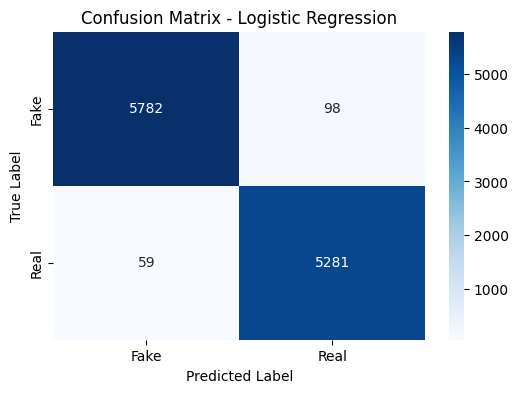

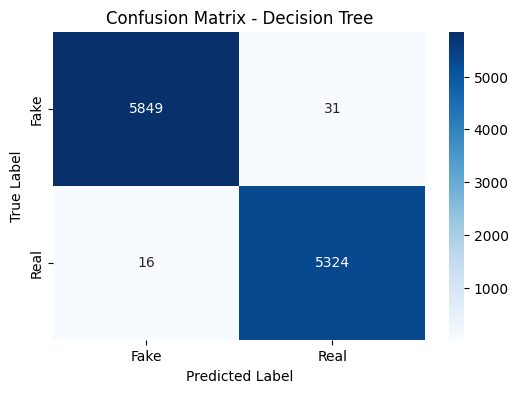

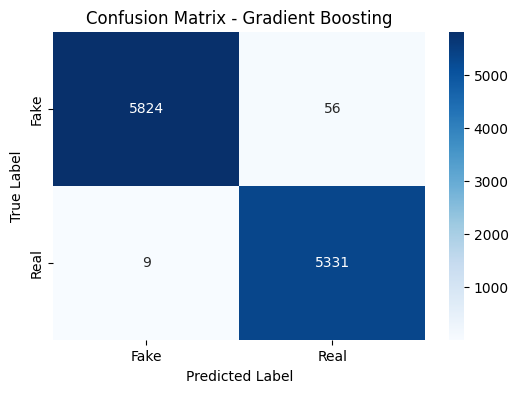

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(cm_lr, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(cm_dt, "Confusion Matrix - Decision Tree")
plot_confusion_matrix(cm_gbc, "Confusion Matrix - Gradient Boosting")


In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_gbc = accuracy_score(y_test, pred_gbc)
accuracy_rfc = accuracy_score(y_test, pred_rfc)

# Print the accuracies
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Gradient Boosting Accuracy: {accuracy_gbc}")
print(f"Random Forest Accuracy: {accuracy_rfc}")



Logistic Regression Accuracy: 0.9860071301247771
Decision Tree Accuracy: 0.9958110516934047
Gradient Boosting Accuracy: 0.9942067736185384
Random Forest Accuracy: 0.9860071301247771


In [50]:
import pickle

# Save Logistic Regression model
filename = 'logistic_regression_model.sav'
pickle.dump(LR, open(filename, 'wb'))

# Save Decision Tree model
filename = 'decision_tree_model.sav'
pickle.dump(DT, open(filename, 'wb'))

# Save Gradient Boosting model
filename = 'gradient_boosting_model.sav'
pickle.dump(GBC, open(filename, 'wb'))

# Save Random Forest model
filename = 'random_forest_model.sav'
pickle.dump(RFC, open(filename, 'wb'))

In [51]:
from google.colab import files

files.download('logistic_regression_model.sav')
files.download('decision_tree_model.sav')
files.download('gradient_boosting_model.sav')
files.download('random_forest_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>